In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import seaborn as sns


df = pd.read_csv("../static_merged_data.csv")
# devide it into labels and features
Y = df[["status"]]
X = df[["T_min","T_max","T_delta","Pow_mean"]]

# split the dataset into train- and testset
X_train, X_test, y_train, y_test = train_test_split(X, Y, shuffle=True, test_size=.2)

class GridSearch:
    def __init__(self, clf, params) -> None:
        self.clf = clf
        self.params = params
        self.grid = GridSearchCV(estimator=self.clf, param_grid=self.params, return_train_score=True, verbose=1,n_jobs=-1)
    
    def train(self,x_train, y_train):
        self.grid.fit(x_train, y_train)

    def plot_selection_process(self):
        ## Results from grid search
        results = self.grid.cv_results_
        means_test = results['mean_test_score']
        stds_test = results['std_test_score']
        means_train = results['mean_train_score']
        stds_train = results['std_train_score']
        ## Getting indexes of values per hyper-parameter
        masks=[]
        masks_names= list(self.grid.best_params_.keys())
        for p_k, p_v in self.grid.best_params_.items():
            masks.append(list(results['param_'+p_k].data==p_v))

        params=self.grid.param_grid

        ## Ploting results
        fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
        fig.suptitle('Score per parameter')
        fig.text(0.04, 0.5, 'MEAN SCORE', va='center', rotation='vertical')
        pram_preformace_in_best = {}
        for i, p in enumerate(masks_names):
            m = np.stack(masks[:i] + masks[i+1:])
            pram_preformace_in_best
            best_parms_mask = m.all(axis=0)
            best_index = np.where(best_parms_mask)[0]
            x = np.array(params[p])
            y_1 = np.array(means_test[best_index])
            e_1 = np.array(stds_test[best_index])
            y_2 = np.array(means_train[best_index])
            e_2 = np.array(stds_train[best_index])
            ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test')
            ax[i].errorbar(x, y_2, e_2, linestyle='-', marker='^',label='train' )
            ax[i].set_xlabel(p.upper())

        plt.legend()
        plt.show()

    def classification_result(self, y_train, y_test):
        # grid.predict() call predict on the estimator with the best found params
        y_pred = self.grid.predict(y_train)
        self.classification_result = classification_report(y_test, y_pred, output_dict=True)
        return self.classification_result

    def plot_classification_result(self):
        df = pd.DataFrame(self.classification_result)
        sns.heatmap(df.iloc[:-1, :].T, annot=True)

In [2]:
params_dict = {
    "criterion": ['gini', 'entropy'],
    "max_depth": range(1,10),
    # "min_samples_split": range(2,10),
    "min_samples_leaf": range(2,10)
}

gs = GridSearch(DecisionTreeClassifier(), params_dict)
gs.train(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


In [3]:
results = gs.classification_result(X_test,y_test)

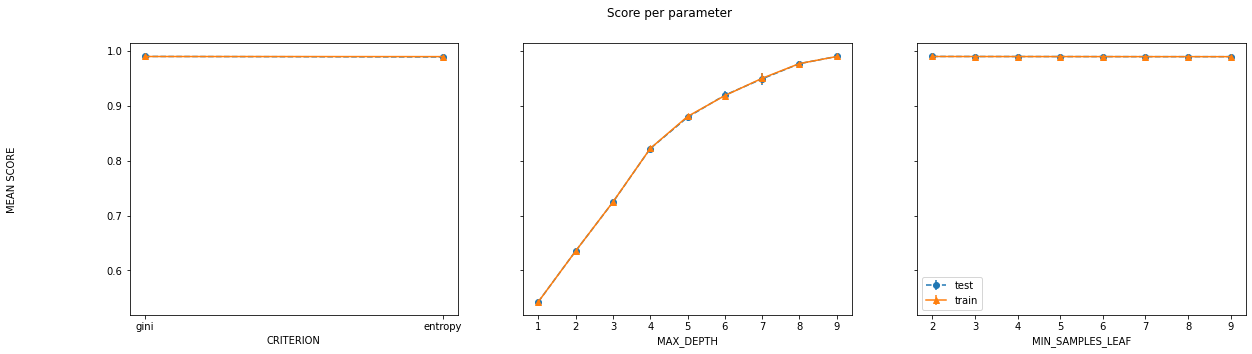

In [4]:
gs.plot_selection_process()

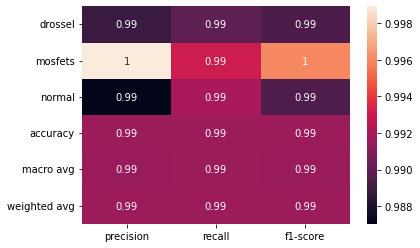

In [5]:
gs.plot_classification_result()

In [6]:
from sklearn.svm import SVC
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

svc_gs = GridSearch(SVC(), params=parameters)
svc_gs.train(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [3]:
from sklearn.svm import SVC
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 2, 3, 4]}
gridi = GridSearchCV(SVC(), param_grid=parameters, n_jobs=-1, return_train_score=True)
gridi.fit(X_train, y_train)

In [5]:
Y["status"] == "drossel"

0         True
1         True
2         True
3         True
4         True
         ...  
96344    False
96345    False
96346    False
96347    False
96348    False
Name: status, Length: 96349, dtype: bool

In [3]:
# Initiaze the hyperparameters for each dictionary
from sklearn.ensemble import RandomForestClassifier
param1 = {}
param1['n_estimators'] = [10, 50, 100, 250]
param1['max_depth'] = [5, 10, 20]

rf_grid = GridSearch(RandomForestClassifier(), param1)
rf_grid.train(X_train, y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


c:\Users\sandr\source\repos\Monitoring_Converter_ML\venv\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [2]:
import pandas as pd

df = pd.read_csv("../static_merged_data.csv")
X = df[["T_min", "T_max"]]
y = df[["status"]]

In [18]:
from sklearn import svm, datasets

iris = datasets.load_iris()
print(iris.data.shape)
irs = iris.data[:, :2]
irs[:, 0].shape

(150, 4)


(150,)

In [11]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

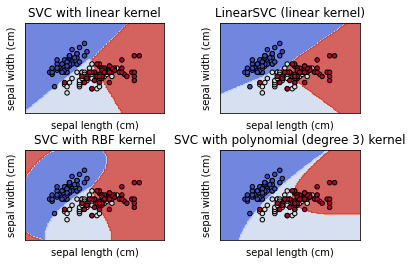

In [19]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.inspection import DecisionBoundaryDisplay


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target


# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)
# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
import pandas as pd

df = pd.read_csv("../static_merged_data.csv")
def transform_one_hot(df):
    return df['status'].apply(lambda x: 0 if x == 'normal' else (1 if x =="drossel" else 2))
    
transform_one_hot(df)

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

x_df = df[["T_min", "T_max"]]
y_df = transform_one_hot(df)


h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(x_df, y_df)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(x_df, y_df)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(x_df, y_df)
lin_svc = svm.LinearSVC(C=C).fit(x_df, y_df)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

tmin_min = x_df["T_min"].min()
tmin_max = x_df["T_min"].max()
tmax_min = x_df["T_max"].min()
tmax_max = x_df["T_max"].max()

min_range = np.arange(tmin_min, tmin_max, 0.5)
max_range = np.arange(tmax_min, tmax_max, 0.5)

xx, yy = np.meshgrid(min_range, max_range)


# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

In [ ]:
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

In [3]:
import pandas as pd
df = pd.read_csv("../static_merged_data.csv")
status = df[["status"]]
# (n,)
status

,status
0,drossel
1,drossel
2,drossel
3,drossel
4,drossel
...,...
96344,normal
96345,normal
96346,normal
96347,normal
